
<br>
This file is for two-class vehicle classification<br>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_vehicle_data
# import time
import pdb

In [3]:
class LogisticClassifier(object):
    def __init__(self, w_shape):
        """__init__
        :param w_shape: create w with shape w_shape using normal distribution
        """
        mean = 0
        std = 1
        self.w = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)
    def feed_forward(self, x):
        """feed_forward
        This function compute the output of your logistic classification model
        :param x: input
        :return result: feed forward result (after sigmoid) 
        """
        # [TODO 1.5]
        # Compute feedforward result
        z = np.dot(x,self.w)
        result = 1/(1+np.exp(-z))
        """
        The result here is the predicted out put, which mean y_hat in the theory and the unit_testpy or this file itself
        """
        return result
    def compute_loss(self, y, y_hat):
        """compute_loss
        Compute the loss using y (label) and y_hat (predicted class)
        :param y:  the label, the actual class of the samples
        :param y_hat: the propabilitis that the given samples belong to class 1
        :return loss: a single value
        """
        # [TODO 1.6]
        # Compute loss value (a single number)
        loss = 0
        # print(y.shape)
        for i in range(y.shape[0]):
            loss += y[i]*np.log(y_hat[i])+(1-y[i])*np.log(1-y_hat[i])
        loss = np.float64(loss/(-y.shape[0]))
        # print(loss.shape)
        """
        This is kinda self-explanatory, the shape is stated pretty clear in this sittuation
        """
        return loss
    def get_grad(self, x, y, y_hat):
        """get_grad
        Compute and return the gradient of w
        :param loss: computed loss between y_hat and y in the train dataset
        :param y_hat: predicted y
        :return w_grad: has the same shape as self.w
        """
        # [TODO 1.7]
        # Compute the gradient matrix of w, it has the same size of w
        w_grad = np.dot(x.T,(y_hat-y))/y.shape[0]
        """
        x has the shape of [5,4069] and y has the shape [5,1], the w_grad should have the shape of [1,number of features/weights]
        """
        return w_grad
    def update_weight(self, grad, learning_rate):
        """update_weight
        Update w using the computed gradient
        :param grad: gradient computed from the loss
        :param learning_rate: float, learning rate
        """
        # [TODO 1.8]
        # Update w using SGD
        self.w = self.w - learning_rate*grad
        """
        since this is a minus operation, the shape of w tend to not change
        """
    def update_weight_momentum(self, grad, learning_rate, momentum, momentum_rate):
        """update_weight with momentum
        Update w using the algorithm with momnetum
        :param grad: gradient computed from the loss
        :param learning_rate: float, learning rate
        :param momentum: the array storing momentum for training w, should have the same shape as w
        :param momentum_rate: float, how much momentum to reuse after each loop (denoted as gamma in the document)
        """
        # [TODO 1.9]
        # Update w using SGD with momentum
        momentum = momentum_rate*momentum + learning_rate*grad
        self.w = self.w - momentum

In [4]:
def plot_loss(all_loss):
    plt.figure(1)
    plt.clf()
    plt.plot(all_loss)

In [5]:
def normalize_per_pixel(train_x, test_x): # train_x and test_x has 2400 matrixes of size 64x64
    """normalize_per_pixel
    This function computes train mean and standard deviation on each pixel then applying data scaling on train_x and test_x using these computed values
    :param train_x: train images, shape=(num_train, image_height, image_width)
    :param test_x: test images, shape=(num_test, image_height, image_width)
    """
    # [TODO 1.1]
    # train_mean and train_std should have the shape of (1, image_height, image_width)
    # train_x = ...
    # test_x = ...
    mean_per_pix = np.sum(train_x, axis = 0 )/train_x.shape[0]
    std_per_pix = np.sqrt(np.sum((x - mean_per_pix)**2 for x in train_x)/train_x.shape[0])
    """
    for x in train_x means that it pull each elements from 2D arrays from each layers
    this means that it pulls out matrixes from the first axis, which is the axis 0
    the shape of both mean and std are [64,64] 
    """
    for i in range(train_x.shape[0]):
        train_x[i] = (train_x[i]-mean_per_pix)/std_per_pix
    for i in range(test_x.shape[0]):
        test_x[i] = (test_x[i]-mean_per_pix)/std_per_pix
    """
    The results of this function are demanded to have the shape of [2400,64,64]
    """
    return train_x, test_x

In [6]:
def normalize_all_pixel(train_x, test_x):
    """normalize_all_pixel
    This function computes train mean and standard deviation on all pixels then applying data scaling on train_x and test_x using these computed values
    :param train_x: train images, shape=(num_train, image_height, image_width)
    :param test_x: test images, shape=(num_test, image_height, image_width)
    """
    # [TODO 1.2]
    # train_mean and train_std should have the shape of (1, image_height, image_width)
    mean = np.full_like(train_x[0],np.mean(train_x))
    std =  np.full_like(train_x[0],np.std(train_x))
    for i in range(train_x.shape[0]):
        train_x[i] = (train_x[i]-mean)/std
    for i in range(test_x.shape[0]):
        test_x[i] = (test_x[i]-mean)/std
    """
    The results here have the similar shape of ones of normalize_per_pix
    """
    return train_x, test_x

In [7]:
def reshape2D(tensor):
    """reshape_2D
    Reshape our 3D tensors to 2D. A 3D tensor of shape (num_samples, image_height, image_width) must be reshaped into (num_samples, image_height*image_width)
    """
    # [TODO 1.3]
    # temp = tensor
    tensor=tensor.reshape(tensor.shape[0],(tensor.shape[1]*tensor.shape[2]))
    """
    Output is demanded to have the shape of [number of samples, 64*64], each image is a row vector.
    """
    return tensor

In [8]:
def add_one(x):
    """add_one
    This function add ones as an additional feature for x
    :param x: input data
    """
    # [TODO 1.4]
    x = np.concatenate((x,np.ones(x.shape[0]).reshape(-1,1)), axis=1) #array of 2400 '1' join in the axis 1
    # the output of this function has the shape of [5,4097] 
    # which means it has 5 samples with the cojoin features of 64*64 with one additional column of 1
    return x

In [9]:
def test(y_hat, test_y):
    """test
    Compute precision, recall and F1-score based on predicted test values
    :param y_hat: predicted values, output of classifier.feed_forward
    :param test_y: test labels
    """

    # [TODO 1.10]
    # Compute test scores using test_y and y_hat
    pos_y_hat = np.where(y_hat.round() == 1)
    pos_test_y = np.where(test_y == 1)
    pos_neg_test_y = np.where(test_y == 0)
    TP = len(np.intersect1d(np.array(pos_y_hat),np.array(pos_test_y)))
    FP = len(np.intersect1d(np.array(pos_y_hat),np.array(pos_neg_test_y)))
    precision = TP/(TP+FP)
    #recall = TP/P
    recall = TP/(np.array(pos_test_y).shape[1])
    f1 = 2*precision*recall/(precision+recall)
    print("Precision: %.3f" % precision)
    print("Recall: %.3f" % recall)
    print("F1-score: %.3f" % f1)
    return precision, recall, f1

In [10]:
def generate_unit_testcase(train_x, train_y):
    train_x = train_x[0:5, :, :]
    train_y = train_y[0:5, :]
    testcase = {}
    testcase['output'] = []
    train_x_norm1, _ = normalize_per_pixel(train_x, train_x)
    train_x_norm2, _ = normalize_all_pixel(train_x, train_x)
    train_x = train_x_norm2
    testcase['train_x_norm1'] = train_x_norm1
    testcase['train_x_norm2'] = train_x_norm2
    train_x = reshape2D(train_x)
    testcase['train_x2D'] = train_x
    train_x = add_one(train_x)
    testcase['train_x1'] = train_x
    learning_rate = 0.001
    momentum_rate = 0.9
    for i in range(10):
        test_dict = {}
        classifier = LogisticClassifier((train_x.shape[1], 1))
        test_dict['w'] = classifier.w
        y_hat = classifier.feed_forward(train_x)
        loss = classifier.compute_loss(train_y, y_hat)
        grad = classifier.get_grad(train_x, train_y, y_hat)
        classifier.update_weight(grad, 0.001)
        test_dict['w_1'] = classifier.w
        momentum = np.ones_like(grad)
        classifier.update_weight_momentum(
            grad, learning_rate, momentum, momentum_rate)
        test_dict['w_2'] = classifier.w
        test_dict['y_hat'] = y_hat
        test_dict['loss'] = loss
        test_dict['grad'] = grad
        testcase['output'].append(test_dict)
    np.save('./data/unittest', testcase)

Reading vehicle data...
EOF Reached
[[124.12152778 123.65819444 123.39638889 ... 124.71611111 124.26833333
  124.54      ]
 [124.29138889 124.56708333 123.61125    ... 124.40027778 124.04361111
  123.92263889]
 [124.86638889 124.62680556 123.62111111 ... 124.51527778 124.24791667
  123.63263889]
 ...
 [124.05208333 123.66388889 123.09986111 ... 121.32777778 122.25666667
  122.21375   ]
 [124.09611111 124.29972222 124.10458333 ... 121.70166667 122.48986111
  123.07805556]
 [124.78361111 124.31458333 124.46361111 ... 122.54666667 123.13694444
  123.51569444]]
[[49.86093252 50.10132208 50.38800844 ... 53.71453748 53.63705564
  53.69699085]
 [50.26221337 49.99852627 50.55848679 ... 53.20277562 53.13179495
  53.0612791 ]
 [52.01168334 51.31539761 51.26715033 ... 52.64057413 52.80362616
  52.34046395]
 ...
 [53.85923027 53.68835648 54.15068551 ... 54.17407186 53.8078212
  53.00791176]
 [53.72671351 53.95707038 54.28046198 ... 54.35889291 54.01682085
  52.98950997]
 [54.26203425 53.81704148 5

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4824\2924291514.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  std_per_pix = np.sqrt(np.sum((x - mean_per_pix)**2 for x in train_x)/train_x.shape[0])


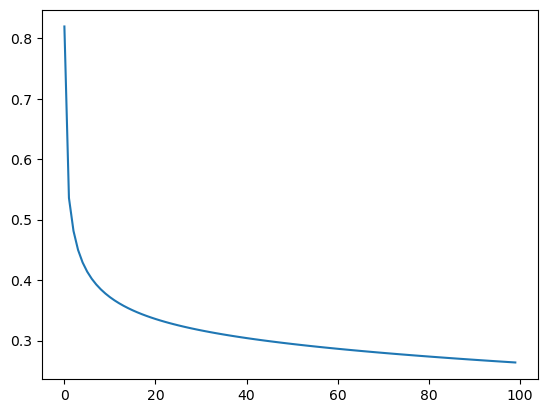

Epoch 100: loss is 0.26371


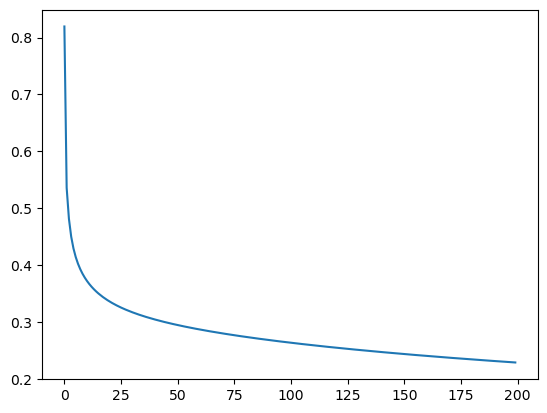

Epoch 200: loss is 0.22853


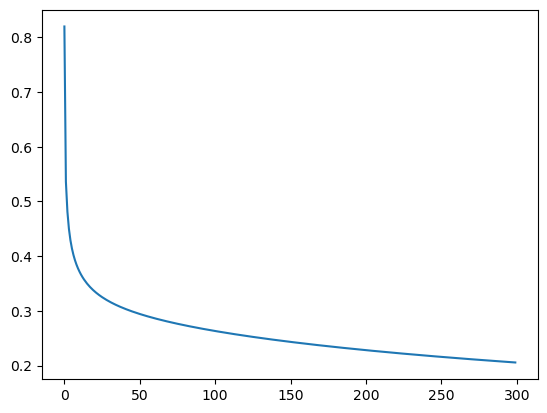

Epoch 300: loss is 0.20576


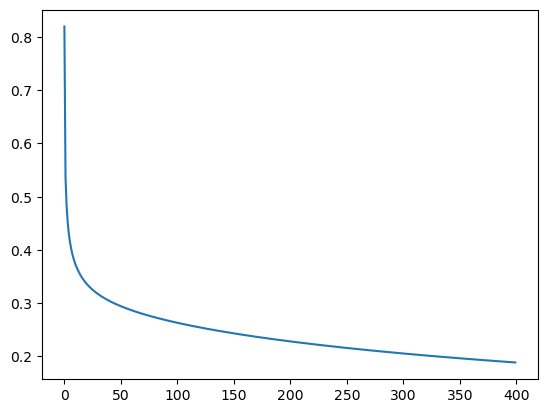

Epoch 400: loss is 0.18873


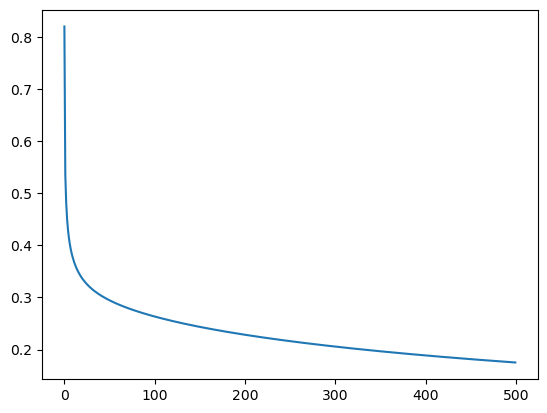

Epoch 500: loss is 0.17513


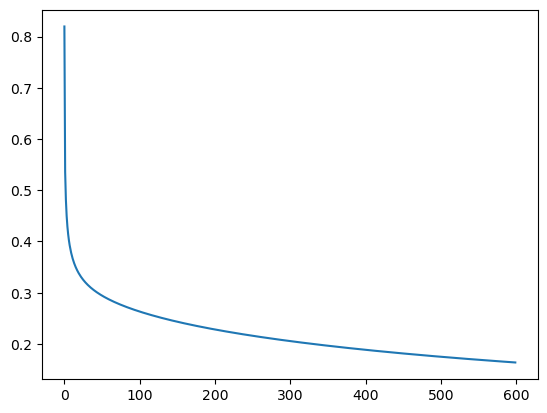

Epoch 600: loss is 0.16386


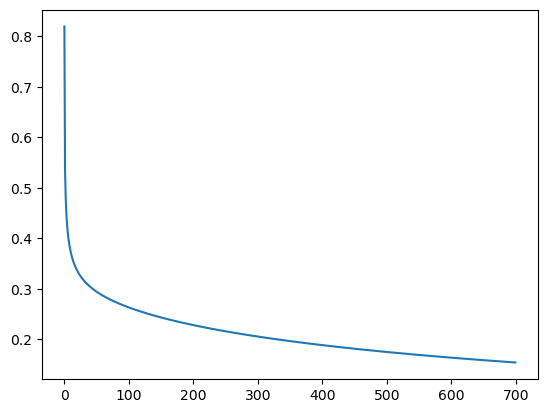

Epoch 700: loss is 0.15427


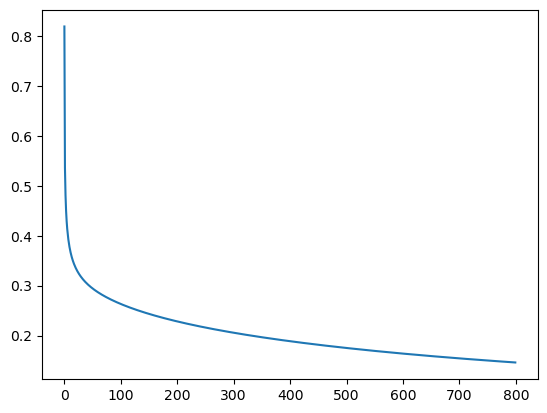

Epoch 800: loss is 0.14596


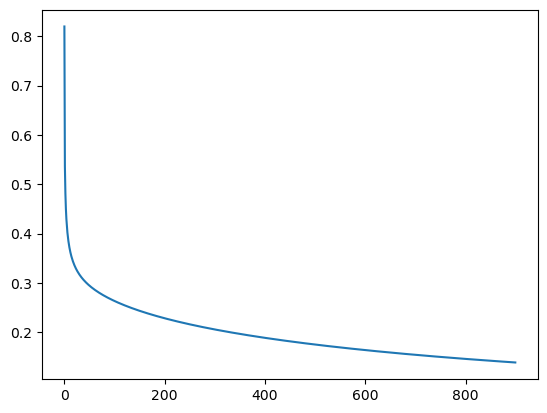

Epoch 900: loss is 0.13867


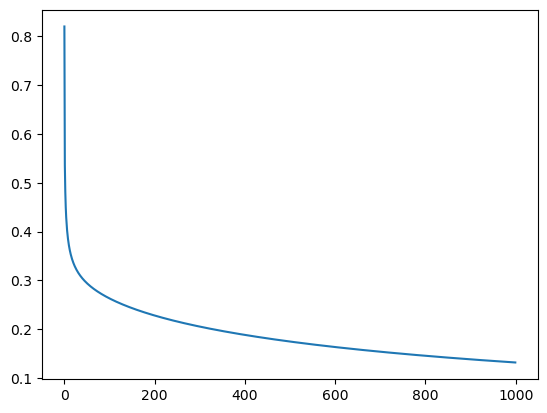

Epoch 1000: loss is 0.13219


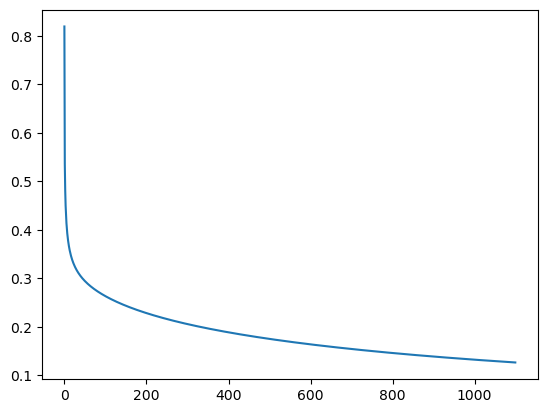

Epoch 1100: loss is 0.12639


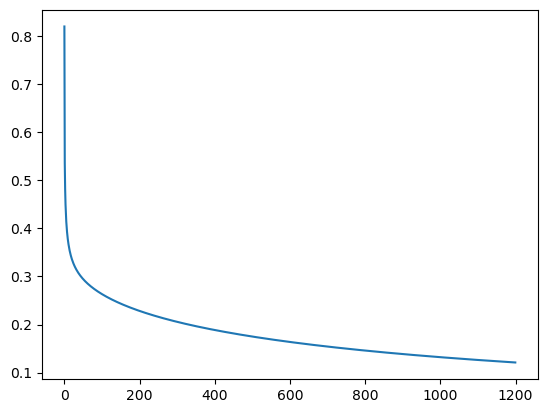

Epoch 1200: loss is 0.12114


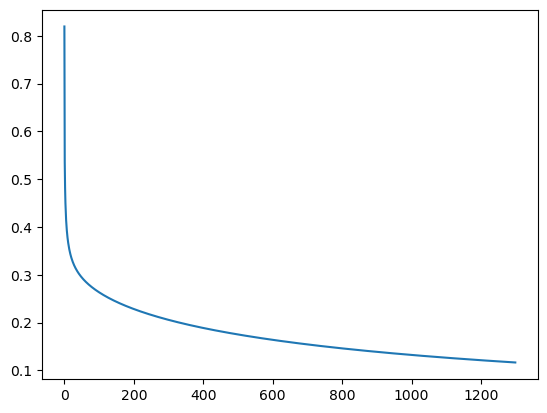

Epoch 1300: loss is 0.11637


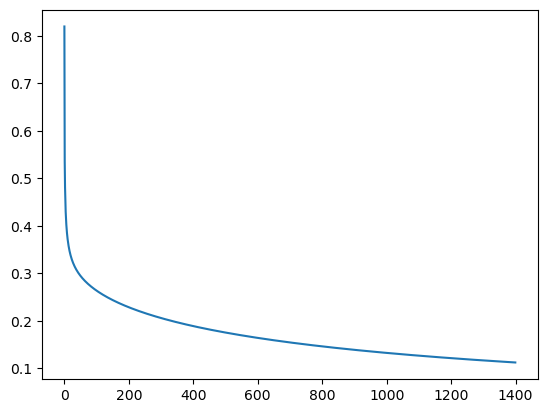

Epoch 1400: loss is 0.11200


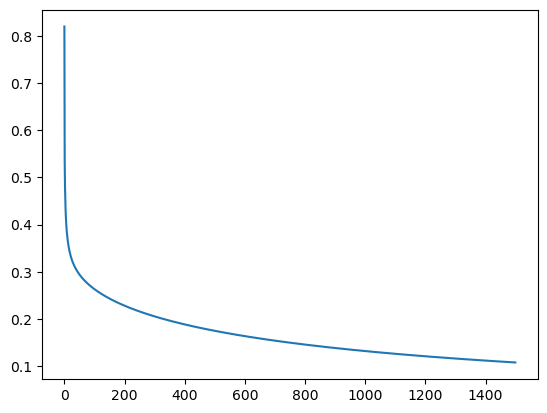

Epoch 1500: loss is 0.10798
Precision: 0.761
Recall: 0.817
F1-score: 0.788


In [11]:
if __name__ == "__main__":
    np.random.seed(2018)

    # Load data from file
    # Make sure that vehicles.dat is in data/
    train_x, train_y, test_x, test_y = get_vehicle_data()
    num_train = train_x.shape[0]
    num_test = test_x.shape[0]

    #generate_unit_testcase(train_x.copy(), train_y.copy())

    # Normalize our data: choose one of the two methods before training
    #train_x, test_x = normalize_all_pixel(train_x, test_x)
    train_x, test_x = normalize_per_pixel(train_x, test_x)
    
    # Reshape our data
    # train_x: shape=(2400, 64, 64) -> shape=(2400, 64*64)
    # test_x: shape=(600, 64, 64) -> shape=(600, 64*64)
    train_x = reshape2D(train_x)
    test_x = reshape2D(test_x)

    # Pad 1 as the last feature of train_x and test_x
    train_x = add_one(train_x)
    test_x = add_one(test_x)

    # Create classifier
    num_feature = train_x.shape[1]
    bin_classifier = LogisticClassifier((num_feature, 1))
    momentum = np.zeros_like(bin_classifier.w)

    # Define hyper-parameters and train-related parameters
    num_epoch = 1500
    learning_rate = 0.01
    momentum_rate = 0.9
    epochs_to_draw = 100
    all_loss = []
    plt.ion()
    # tic = time.clock()
    for e in range(num_epoch):
        # tic = time.clock()
        y_hat = bin_classifier.feed_forward(train_x)
        loss = bin_classifier.compute_loss(train_y, y_hat)
        grad = bin_classifier.get_grad(train_x, train_y, y_hat)

        # Updating weight: choose either normal SGD or SGD with momentum
        #bin_classifier.update_weight(grad, learning_rate)
        bin_classifier.update_weight_momentum(
            grad, learning_rate, momentum, momentum_rate)
        all_loss.append(loss)
        if (e % epochs_to_draw == epochs_to_draw-1):
            plot_loss(all_loss)
            plt.show()
            plt.pause(0.1)
            print("Epoch %d: loss is %.5f" % (e+1, loss))
        # toc = time.clock()
        # print(toc-tic)
    y_hat = bin_classifier.feed_forward(test_x)
    test(y_hat, test_y)